In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from os.path import join
import os
import copy
from matplotlib import cm
import matplotlib.gridspec as gridspec
from main_functions import *

In [177]:
sns.set_style('white')
plt.rcParams['axes.linewidth'] = 0.1

In [3]:
DATA = 'data/'

In [4]:
HEIGHT = 3

In [5]:
proteins = ['1be9', '1d5r', '1nd4', '3dqw', '4bz3']
protein_names = ['PSD95', 'PTEN', 'APH(3\')II', 'Src CD', 'VIM-2']
get_name = dict(zip(proteins, protein_names))
measures = ['nodes', 'edges', 'weight', 'distance']

In [6]:
data_path = join(DATA, 'structure')
thresholds = [round(i, 1) for i in np.linspace(3, 10, 71)]
sample_thresholds = [round(i, 1) for i in np.linspace(3, 10, 8)]

In [7]:
functional_data = dict()
for protein in proteins:
    csv_file = join(DATA, f'functional_{protein}.csv')
    functional_data[protein] = pd.read_csv(csv_file, index_col=0, header=0)

In [182]:
tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 10,
    "font.size": 10,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 8,
    "xtick.labelsize": 6,
    "ytick.labelsize": 6
}

plt.rcParams.update(tex_fonts)

In [10]:
plt.rcParams["figure.facecolor"] = 'white'

In [11]:
fig_width_in = 440.84746/72.27

In [12]:
fig_width_in = round(fig_width_in, 1)

In [13]:
fig_width_in

6.1

In [281]:
def PlotHeatmap(dataframe, save_as=None, title=None, vmin=None, vmax=None, center=0, reverse=False, ax=None):
    """Plot heatmap of dataframe values.
    
    Parameters:
        dataframe: data to plot
        save_as: name of file to save. If None, image is not saved
        vmin, vmax: min and max values for colorscale
    """
    # Set size to match dataframe dimensions
    w = len(dataframe.columns)
    h = len(dataframe.index)
    ratio = h/w
    
    if not ax:
        plt.figure(figsize=(fig_width_in, fig_width_in*ratio+0.5), constrained_layout=True)
        ax=plt.gca() 

    cmap = copy.copy(plt.get_cmap('RdBu')) if reverse else copy.copy(plt.get_cmap('RdBu_r'))
    cmap.set_bad('#94A3A8') # Set missing values gray 
    heatmap = sns.heatmap(dataframe, cmap=cmap, center=center, cbar=False, square=True, yticklabels=False,
                          xticklabels=False, vmin=vmin, vmax=vmax, ax=ax)
    ax.set_ylabel('AA', fontsize=8)
    ax.set_xlabel('Positions', fontsize=8)
    if title:
        ax.set_title(title, fontsize=10)
        
    if save_as:
        fig = heatmap.get_figure()
        fig.savefig(f'{save_as}.png', dpi=300) # bbox_inches='tight')
        
    if ax: 
        ax.set_xlabel('')
        ax.set_ylabel('')
        return 
    return heatmap

In [310]:
# get colors to match RdBu cmap
rdbu = cm.get_cmap('RdBu', 24)
red = rdbu(5)
blue = rdbu(19)
lightblue = rdbu(15)
lightred = rdbu(9)

## Sensitivity predictions

In [267]:
def PlotPredictions(functional_percentage, network_mincount, measure_cutoffs, protein, ax, thresh=9.0):
    """Plot predictions for one protein in subplot. """     
    mean = functional_data[protein].mean()
    positions = functional_data[protein].columns
    n = len(positions)
    predictions = GetNetworkExtremes(protein, network_mincount, measure_cutoffs, thresh)

    # values to plot, depending on whether they are predicted or not
    predicted_values = [mean[pos] for pos in positions if pos in predictions]
    predicted_indices = [i for i,pos in enumerate(positions) if pos in predictions]
    other_values = [mean[pos] for pos in positions if pos not in predictions]
    other_indices = [i for i,pos in enumerate(positions) if pos not in predictions]
    
    ax.plot(other_indices, other_values, color=red, marker='o', markersize=1.5, markeredgewidth=0.0, linewidth=0)
    ax.plot(predicted_indices, predicted_values, color=blue, marker='o',markersize=1.5,  markeredgewidth=0.0, 
            linewidth=0)

    # mark functional percentage
    mean_list = list(mean)
    mean_list.sort()
    m = mean_list[int(n*0.4)]

    ax.set_xlim([-1, len(positions)])

    min_y, max_y = mean_list[0], mean_list[-1]
    gap = (max_y-min_y)*0.05
    ax.set_ylim(min_y-gap, max_y+gap)
    ax.set_xticks([])
    ax.set_yticks([])

    ax.axhspan(min_y-gap, m, facecolor=lightblue, alpha=0.25, 
                           label=f'Bottom {int(100*functional_percentage)}\% of values')

    ax.set_title(get_name[protein], fontsize=10)

    #handles, labels = ax.get_legend_handles_labels()
    # fig.legend(handles, labels)

    return 

In [ ]:
func = pd.read_csv(join(DATA, 'functional_4bz3.csv'), index_col=0)

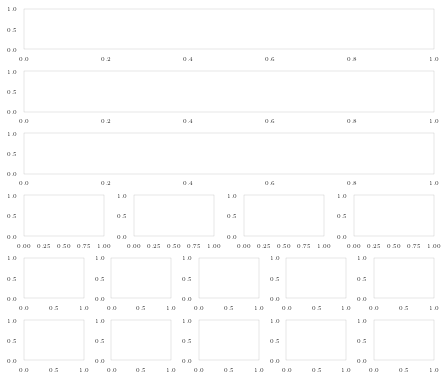

In [298]:
labels1 = ['PSD95', 'PTEN', 'APH(3\')II', 'Src CD', 'VIM-2']
w = len(func.columns)
h = len(func.index)
ratio = h/w

fig = plt.figure(figsize=(fig_width_in, 6*fig_width_in*ratio+2), constrained_layout=True)
gs = gridspec.GridSpec(6, 20, figure=fig)

## axes
ax0 = fig.add_subplot(gs[0, :])
ax1 = fig.add_subplot(gs[1, :])
ax2 = fig.add_subplot(gs[2, :]) ## first lines full 
## split fourth line into four
ax30, ax31 = fig.add_subplot(gs[3, 0:5]), fig.add_subplot(gs[3, 5:10])
ax32, ax33 = fig.add_subplot(gs[3, 10:15]), fig.add_subplot(gs[3, 15:20]) 
## split fifth line into five
ax40, ax41, ax42 = fig.add_subplot(gs[4,0:4]), fig.add_subplot(gs[4, 4:8]), fig.add_subplot(gs[4, 8:12])
ax43, ax44 = fig.add_subplot(gs[4, 12:16]), fig.add_subplot(gs[4, 16:20])
## split sixth line into five
ax50, ax51, ax52 = fig.add_subplot(gs[5,0:4]), fig.add_subplot(gs[5, 4:8]), fig.add_subplot(gs[5, 8:12])
ax53, ax54 = fig.add_subplot(gs[5, 12:16]), fig.add_subplot(gs[5, 16:20]) 

In [299]:
## ax0, ax1 have heatmaps for 4bz3
PlotHeatmap(functional_data['4bz3'], title=get_name['4bz3'], reverse=False, ax=ax0)
PlotHeatmap(Standardize('4bz3', 9.0, 'nodes'), reverse=True, ax=ax1)
## ax2 has 4bz3 protein, max precision
PlotPredictions(0.4, 3, [1.5]*3, '4bz3', ax2)
## ax30 - ax33 rest of proteins, max precision
for ax, protein in [(ax30, '1be9'), (ax31, '1d5r'), (ax32, '1nd4'), (ax33, '3dqw')]:
    PlotPredictions(0.4, 3, [1.5]*3, protein, ax)
## ax40 - ax44 max recall
for ax, protein in [(ax40, '1be9'), (ax41, '1d5r'), (ax42, '1nd4'), (ax43, '3dqw'), (ax44, '4bz3')]:
    PlotPredictions(0.4, 2, [1]*3, protein, ax)
## ax50 - ax54 max both
for ax, protein in [(ax50, '1be9'), (ax51, '1d5r'), (ax52, '1nd4'), (ax53, '3dqw'), (ax54, '4bz3')]:
    PlotPredictions(0.4, 2, [1.5]*3, protein, ax)

In [300]:
## set outer labels
ax1.set_ylabel('Amino Acids', fontsize=10, y=1.2)
ax40.set_ylabel('Mean Functional Value', fontsize=10, y=1.25)
ax52.set_xlabel('Positions', fontsize=10)

Text(0.5, -0.999760000000145, 'Positions')

In [301]:
## add legend
ax50.plot([], [], color=red, marker='o', markersize=3, markeredgewidth=0.0, linewidth=0,
         label='Positions not predicted')
ax50.plot([], [], color=blue, marker='o',markersize=3,  markeredgewidth=0.0, linewidth=0, label='Positions predicted')

handles, labels = ax50.get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(0, 0), loc='upper left', ncol=3, frameon=False)

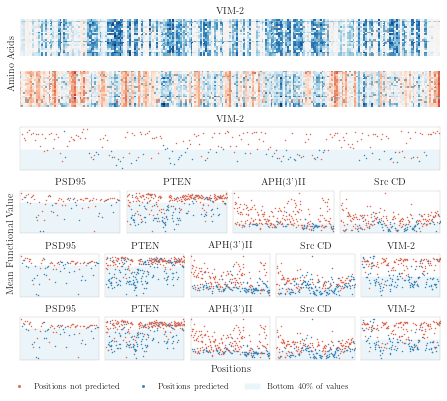

In [302]:
fig

In [305]:
fig.savefig('figures/loss.png', dpi=300, bbox_inches='tight')

## Robust predictions

In [357]:
def PlotPredictionsGain(functional_percentage, network_mincount, measure_cutoffs, protein, ax, thresh=9.0):
    """Plot predictions for one protein in subplot. """     
    mean = functional_data[protein].mean()
    positions = functional_data[protein].columns
    n = len(positions)
    predictions_loss = GetNetworkExtremes(protein, network_mincount, measure_cutoffs, thresh)
    predictions = set([pos for pos in positions if pos not in predictions_loss])

    # values to plot, depending on whether they are predicted or not
    predicted_values = [mean[pos] for pos in positions if pos in predictions]
    predicted_indices = [i for i,pos in enumerate(positions) if pos in predictions]
    other_values = [mean[pos] for pos in positions if pos not in predictions]
    other_indices = [i for i,pos in enumerate(positions) if pos not in predictions] 
    
    ax.plot(other_indices, other_values, color=red, marker='o', markersize=1.5, markeredgewidth=0.0, linewidth=0)
    ax.plot(predicted_indices, predicted_values, color=blue, marker='o',markersize=1.5,  markeredgewidth=0.0, 
            linewidth=0)

    # mark functional percentage
    mean_list = list(mean)
    mean_list.sort(reverse=True)
    m = mean_list[int(n*0.4)]

    ax.set_xlim([-1, len(positions)])

    min_y, max_y = mean_list[-1], mean_list[0]
    gap = (max_y-min_y)*0.05
    ax.set_ylim(min_y-gap, max_y+gap)

    ax.set_title(protein_names[-1])
    ax.axhspan(m, max_y+gap, facecolor=lightred, alpha=0.25,
                           label=f'Top {int(100*functional_percentage)}\% of values')

    ax.set_title(get_name[protein], fontsize=10)

    ax.set_xticks([])
    ax.set_yticks([])

    return 

In [358]:
func = pd.read_csv(join(DATA, 'functional_1d5r.csv'), index_col=0)

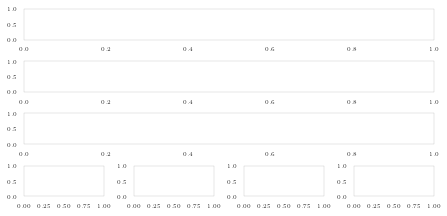

In [366]:
w = len(func.columns)
h = len(func.index)
ratio = h/w

fig = plt.figure(figsize=(fig_width_in, 4*fig_width_in*ratio+1.3), constrained_layout=True)
gs = gridspec.GridSpec(4, 20, figure=fig)

## lines 
ax0 = fig.add_subplot(gs[0, :])
ax1 = fig.add_subplot(gs[1, :])
ax2 = fig.add_subplot(gs[2, :]) ## first lines full 
## split fourth line into four
ax30, ax31 = fig.add_subplot(gs[3, 0:5]), fig.add_subplot(gs[3, 5:10])
ax32, ax33 = fig.add_subplot(gs[3, 10:15]), fig.add_subplot(gs[3, 15:20]) 

In [367]:
## ax0, ax1 have heatmaps for 1d5r
PlotHeatmap(functional_data['1d5r'], title=get_name['1d5r'], reverse=False, ax=ax0)
PlotHeatmap(Standardize('1d5r', 9.0, 'nodes'), reverse=True, ax=ax1)
## ax2 has 1d5r protein
PlotPredictionsGain(0.4, 1, [1]*3, '1d5r', ax2)
## ax30 - ax33 rest of proteins, max precision
for ax, protein in [(ax30, '1be9'), (ax31, '1nd4'), (ax32, '3dqw'), (ax33, '4bz3')]:
    PlotPredictionsGain(0.4, 1, [1]*3, protein, ax)

In [368]:
## set outer labels
ax1.set_ylabel('Amino Acids', fontsize=10, y=1.2)
ax30.set_ylabel('MFV', fontsize=10, y=1.25)
fig.suptitle('Positions', fontsize=10, x=0.51, y=-0.01)

Text(0.51, -0.01, 'Positions')

In [369]:
## add legend
ax30.plot([], [], color=red, marker='o', markersize=3, markeredgewidth=0.0, linewidth=0,
         label='Positions not predicted')
ax30.plot([], [], color=blue, marker='o',markersize=3,  markeredgewidth=0.0, linewidth=0, label='Positions predicted')

handles, labels = ax30.get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(0, -0.05), loc='upper left', ncol=3, frameon=False)

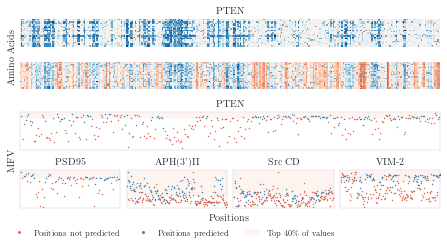

In [370]:
fig

In [372]:
fig.savefig('figures/gain.png', dpi=300, bbox_inches='tight')

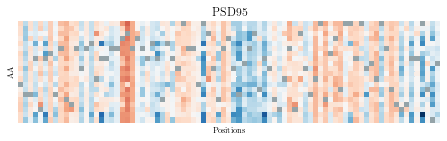

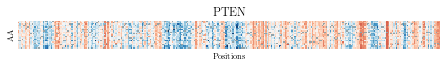

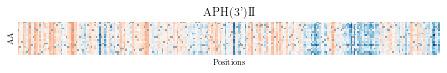

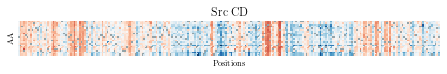

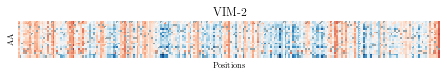

In [87]:
for protein in proteins:
    name = get_name[protein]
    PlotHeatmap(Standardize(protein, 9.0, 'nodes'), save_as=f"figures/heatmap_structure_{protein}", 
                title=name, reverse=True)